# Naive Bayes Classifier
Naive Bayes classifiers are a collection of classification algorithms based on Bayes' Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other.
<br><br>
For example, a fruit may be considered to be an apple if it is red, round, and about 3 inches in diameter. Even if these features depend on each other or upon the existence of the other features, all of these properties independently contribute to the probability that this fruit is an apple and that is why it is known as ‘Naive’.
<br><br>
Naive Bayes model is easy to build and particularly useful for very large data sets. Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods.


In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

## DataFraming

In [30]:
data = pd.read_csv("credit_data.csv")
data.head()

,clientid,income,age,loan,LTI,default
0,1,66155.925095,59.017015,8106.532131,0.122537,0
1,2,34415.153966,48.117153,6564.745018,0.190752,0
2,3,57317.170063,63.108049,8020.953296,0.139940,0
3,4,42709.534201,45.751972,6103.642260,0.142911,0
4,5,66952.688845,18.584336,8770.099235,0.130989,1


In [31]:
data.shape

(2000, 6)

## Feature Extraction

In [32]:
data.features = data[["income", "age", "loan"]]
data.target = data.default

feature_train, feature_test, target_train, target_test = train_test_split(data.features, data.target)

/home/nsl54/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
/home/nsl54/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


## Training Model

In [33]:
model = GaussianNB()
model = model.fit(feature_train, target_train)
predictions = model.predict(feature_test)

## Printing Error Matrix and Accuracy Score

In [34]:
print(confusion_matrix(target_test, predictions))
print(accuracy_score(target_test, predictions))

[[428   7]
 [ 22  43]]
0.942


<AxesSubplot:>

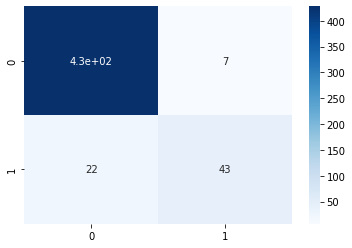

In [35]:
import seaborn as sns
sns.heatmap(confusion_matrix(target_test,predictions), annot=True, cmap='Blues')